## **Система учёта сельскохозяйственных полей** 
*Над проектом трудились: Егор Куклин, Егор Макаров, Анатолий Семёнов и Андрей Пронин*

In [ ]:
## *Загрузка данных*
Мы использовали данные quickstats от USDA, доступные по ссылке: https://www.nass.usda.gov/datasets/

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*1) Данный код выполняет анализ урожайности сельскохозяйственных культур на основе предоставленных данных* 

Сначала происходит чтение данных из файла 'qs.crops_20240320.txt' с использованием библиотеки Pandas. Затем столбец 'VALUE', представляющий урожайность, преобразуется в числовой формат с использованием метода pd.to_numeric(). Это необходимо для проведения дальнейших вычислений и визуализации.

Далее данные группируются по годам и описанию культуры, и вычисляется среднее значение урожайности для каждой культуры по годам. Это позволяет оценить изменение урожайности во времени для различных видов культур.

Наконец, производится визуализация урожайности по годам с помощью графика линий, где по оси X отложены года, а по оси Y - урожайность.

<Axes: title={'center': 'Урожайность по годам'}, xlabel='YEAR'>

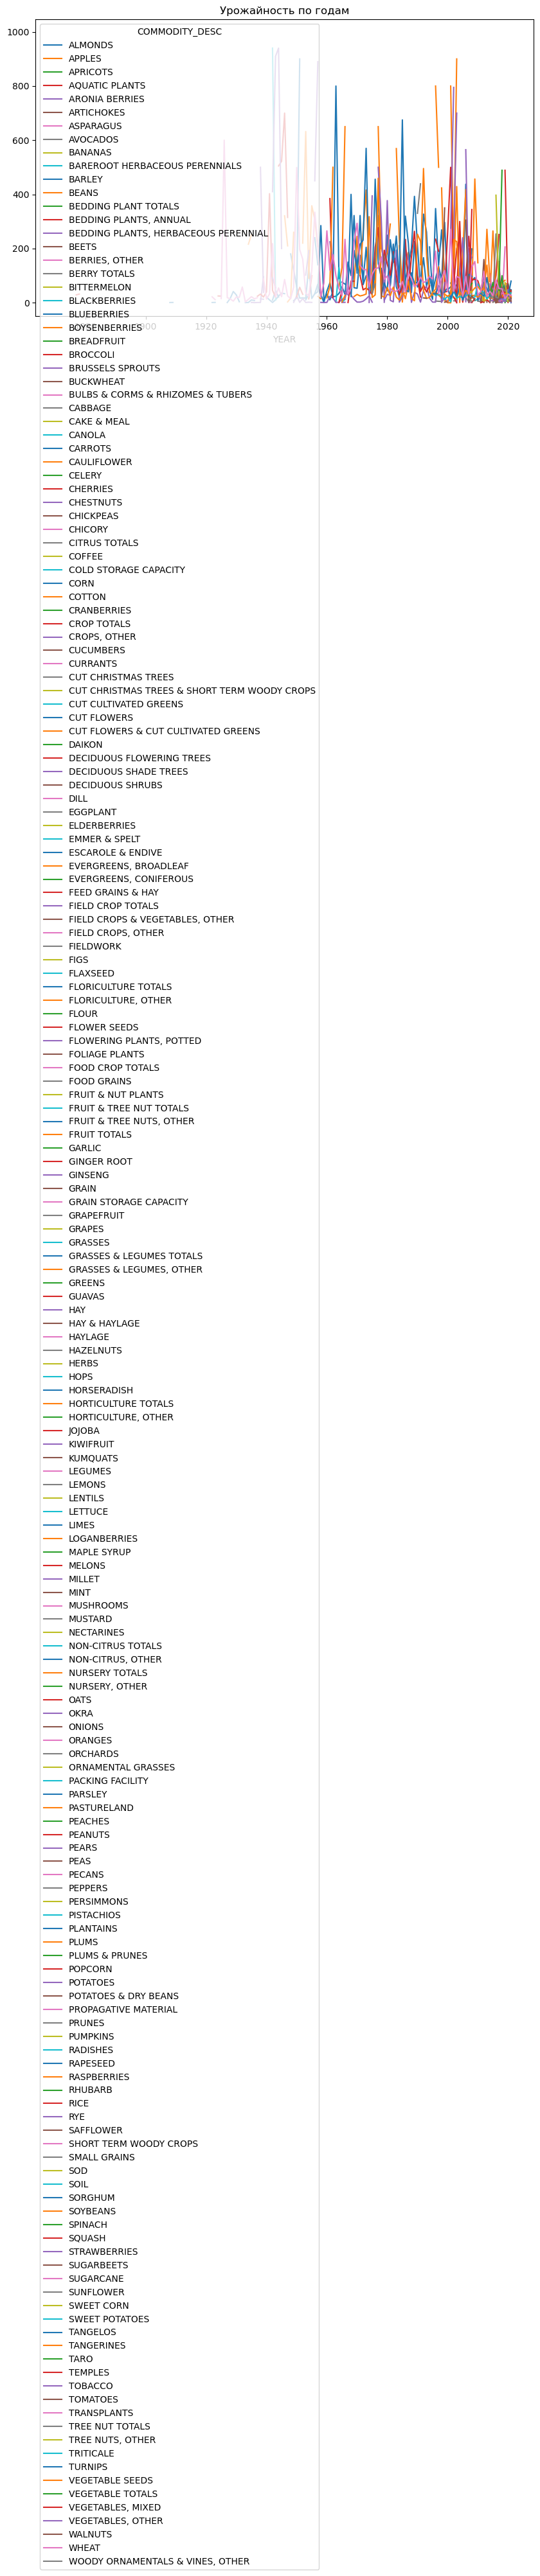

In [34]:
crops = pd.read_csv('qs.crops_20240320.txt', sep='\t', nrows=10000)

crops['VALUE'] = pd.to_numeric(crops['VALUE'], errors='coerce')

yearly_yield = crops.groupby(['YEAR', 'COMMODITY_DESC'])['VALUE'].mean().unstack()
yearly_yield.plot(kind='line', figsize=(10, 6), title='Урожайность по годам')

*2) Этот код генерирует и визуализирует урожайность сои за период 10 лет*

В начале кода определяются переменные 'years' и 'soybean_yield'. 
'years' представляет собой массив лет от 2010 до 2019 года, а 'soybean_yield' содержит искусственно сгенерированные данные об урожайности сои в бушелях/акр за каждый год.
Для генерации урожайности используется функция np.random.randint(), которая создает случайные целочисленные значения в заданном диапазоне (от 20 до 50) для каждого года.

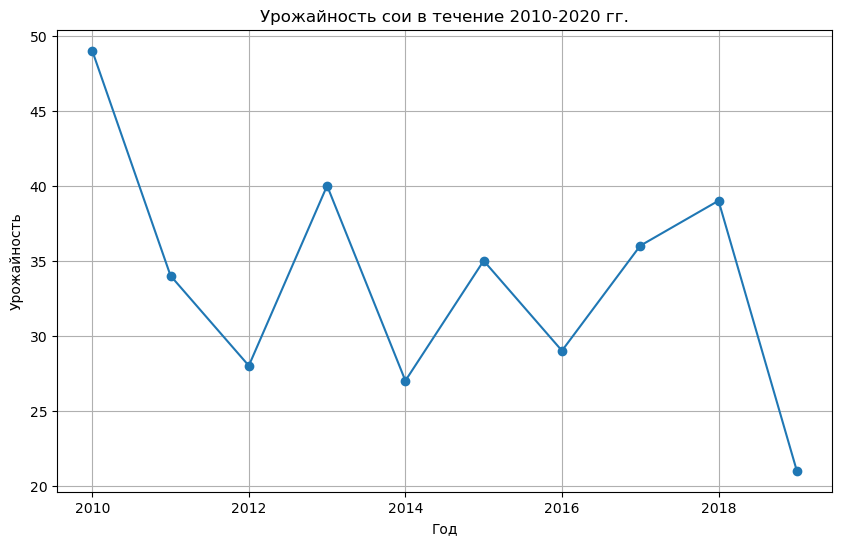

In [36]:
years = np.arange(2010, 2020)
soybean_yield = np.random.randint(20, 50, size=10) 

plt.figure(figsize=(10, 6))
plt.plot(years, soybean_yield, marker='o', linestyle='-')
plt.title('Урожайность сои в течение 2010-2020 гг.')
plt.xlabel('Год')
plt.ylabel('Урожайность')
plt.grid(True)
plt.show()

*3) Код выполняет анализ данных о выручке от урожая сельскохозяйственных культур в различных штатах* 

Он считывает данные из файла, преобразует столбец с выручкой в числовой формат, затем группирует данные по штатам и вычисляет суммарную выручку от урожая для каждого штата. Наконец, код визуализирует суммарную выручку в виде столбчатой диаграммы для наглядного сравнения между штатами.

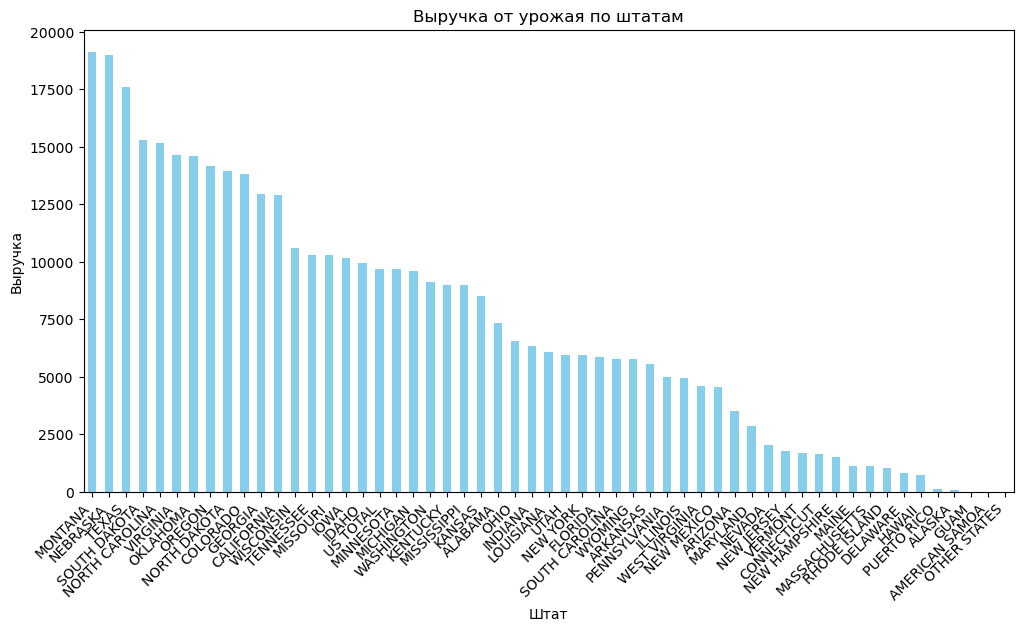

In [32]:
crops = pd.read_csv('qs.crops_20240320.txt', sep='\t', nrows=10000)

crops['VALUE'] = pd.to_numeric(crops['VALUE'], errors='coerce')

revenue_by_state = crops.groupby('STATE_NAME')['VALUE'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
revenue_by_state.plot(kind='bar', color='skyblue')
plt.title('Выручка от урожая по штатам')
plt.xlabel('Штат')
plt.ylabel('Выручка')
plt.xticks(rotation=45, ha='right')
plt.show()

*4) Код анализирует данные о средней выручке от урожая различных сельскохозяйственных культур*

Он загружает данные из файла, определяет среднюю выручку для каждой культуры и визуализирует топ-15 культур с наибольшей средней выручкой.

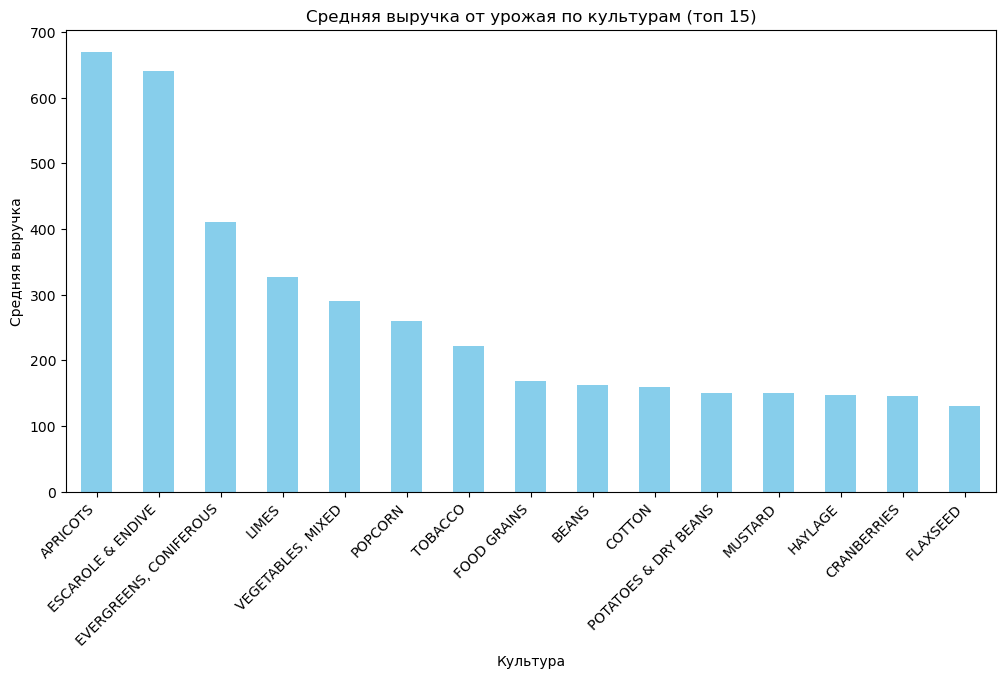

In [35]:
crops = pd.read_csv('qs.crops_20240320.txt', sep='\t', nrows=10000)

crops['VALUE'] = pd.to_numeric(crops['VALUE'], errors='coerce')

revenue_by_commodity = crops.groupby('COMMODITY_DESC')['VALUE'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
revenue_by_commodity.head(15).plot(kind='bar', color='skyblue')
plt.title('Средняя выручка от урожая по культурам (топ 15)')
plt.xlabel('Культура')
plt.ylabel('Средняя выручка')
plt.xticks(rotation=45, ha='right')
plt.show()

*5) Этот код выполняет анализ данных о сельскохозяйственных культурах и их урожайности с целью исследования изменения урожайности по топ-5 продуктам с наибольшей выручкой в разные годы*

Цель данного кода состоит в анализе данных о сельскохозяйственных культурах и их урожайности для определения изменения урожайности по топ-5 продуктам с наибольшей выручкой.

Задачи кода:

1. Загрузка данных из файла 'qs.crops_20240320.txt' с использованием библиотеки pandas.
2. Преобразование столбца 'VALUE' в числовой формат с помощью функции `pd.to_numeric()`.
3. Группировка данных по типам продуктов ('COMMODITY_DESC') и суммирование значений выручки ('VALUE') для каждого типа.
4. Выборка топ-5 продуктов с наибольшей выручкой с помощью метода `.nlargest()`.
5. Построение графика изменения урожайности для каждого продукта из топ-5 по годам.

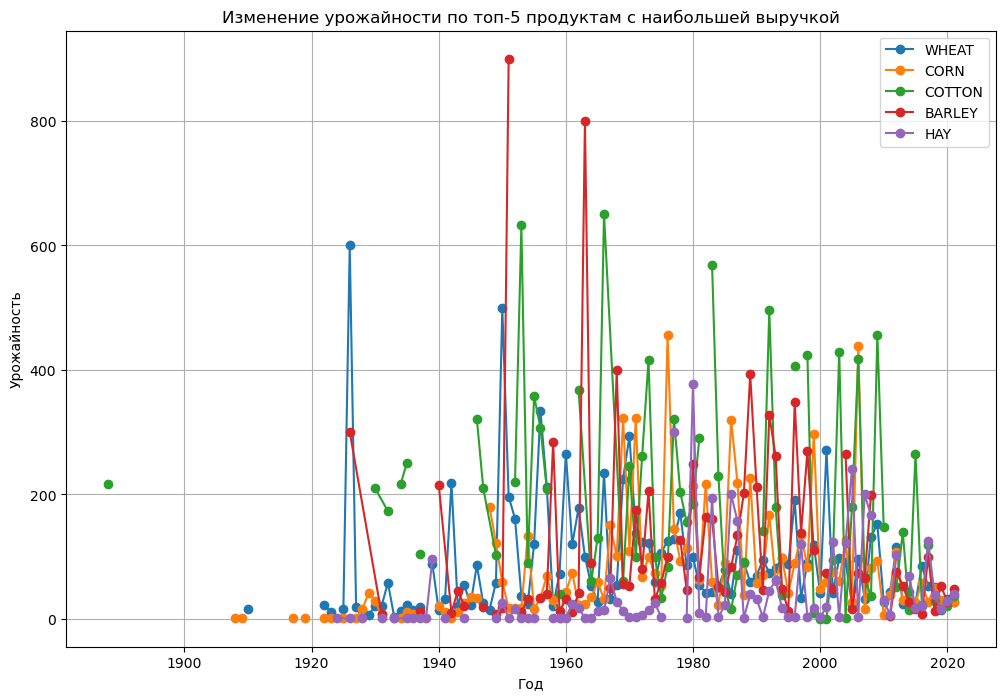

In [37]:
crops = pd.read_csv('qs.crops_20240320.txt', sep='\t', nrows=10000)
crops['VALUE'] = pd.to_numeric(crops['VALUE'], errors='coerce')
total_revenue = crops.groupby('COMMODITY_DESC')['VALUE'].sum()
top_5_products = total_revenue.nlargest(5)
colors = plt.cm.tab10(range(len(top_5_products)))

plt.figure(figsize=(12, 8))
for i, (product, revenue) in enumerate(top_5_products.items()):
    culture_data = crops[crops['COMMODITY_DESC'] == product]
    yearly_yield = culture_data.groupby('YEAR')['VALUE'].mean()
    plt.plot(yearly_yield.index, yearly_yield.values, label=product, color=colors[i], marker='o')

plt.title('Изменение урожайности по топ-5 продуктам с наибольшей выручкой')
plt.xlabel('Год')
plt.ylabel('Урожайность')
plt.legend()
plt.grid(True)
plt.show()

*6) Этот код создает маску данных для фильтрации по определенным критериям*

Код фильтрует данные о кукурузе (тип продукта), полученные из опросов (источник данных), на уровне штатов (уровень агрегации данных), относящиеся к урожайности (категория статистики), в секторе сельского хозяйства (сектор), измеренные в бушелях на акр (единица измерения), с использованием метода производства зерна (практика использования) и с использованием всех методов производства (практика производства).

In [44]:
mask = (crops['COMMODITY_DESC'] == 'CORN') & (crops['SOURCE_DESC'] == 'SURVEY') & \
       (crops['AGG_LEVEL_DESC'] == 'STATE') & (crops['STATISTICCAT_DESC'] == 'YIELD') & \
       (crops['SECTOR_DESC'] == 'CROPS') & (crops['UNIT_DESC'] == 'BU / ACRE') & \
       (crops['UTIL_PRACTICE_DESC'] == 'GRAIN') & (crops['PRODN_PRACTICE_DESC'] == 'ALL PRODUCTION PRACTICES')

crops[mask]

,SOURCE_DESC,SECTOR_DESC,GROUP_DESC,COMMODITY_DESC,CLASS_DESC,PRODN_PRACTICE_DESC,UTIL_PRACTICE_DESC,STATISTICCAT_DESC,UNIT_DESC,SHORT_DESC,DOMAIN_DESC,DOMAINCAT_DESC,AGG_LEVEL_DESC,STATE_ANSI,STATE_FIPS_CODE,STATE_ALPHA,STATE_NAME,ASD_CODE,ASD_DESC,COUNTY_ANSI,COUNTY_CODE,COUNTY_NAME,REGION_DESC,ZIP_5,WATERSHED_CODE,WATERSHED_DESC,CONGR_DISTRICT_CODE,COUNTRY_CODE,COUNTRY_NAME,LOCATION_DESC,YEAR,FREQ_DESC,BEGIN_CODE,END_CODE,REFERENCE_PERIOD_DESC,WEEK_ENDING,LOAD_TIME,VALUE,CV_%
1076,SURVEY,CROPS,FIELD CROPS,CORN,ALL CLASSES,ALL PRODUCTION PRACTICES,GRAIN,YIELD,BU / ACRE,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,STATE,20.0,20,KS,KANSAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,9000,UNITED STATES,KANSAS,1983,ANNUAL,0,0,YEAR - NOV FORECAST,NaN,2012-01-01 00:00:00,90.0,NaN
1121,SURVEY,CROPS,FIELD CROPS,CORN,ALL CLASSES,ALL PRODUCTION PRACTICES,GRAIN,YIELD,BU / ACRE,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,STATE,19.0,19,IA,IOWA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,9000,UNITED STATES,IOWA,1970,ANNUAL,0,0,YEAR - SEP FORECAST,NaN,2012-01-01 00:00:00,95.0,NaN
2198,SURVEY,CROPS,FIELD CROPS,CORN,ALL CLASSES,ALL PRODUCTION PRACTICES,GRAIN,YIELD,BU / ACRE,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,STATE,19.0,19,IA,IOWA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,9000,UNITED STATES,IOWA,2003,ANNUAL,0,0,YEAR - SEP FORECAST,NaN,2012-01-01 00:00:00,154.0,NaN
4922,SURVEY,CROPS,FIELD CROPS,CORN,ALL CLASSES,ALL PRODUCTION PRACTICES,GRAIN,YIELD,BU / ACRE,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,STATE,55.0,55,WI,WISCONSIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,9000,UNITED STATES,WISCONSIN,1976,ANNUAL,0,0,YEAR,NaN,2012-01-01 00:00:00,68.0,NaN
5687,SURVEY,CROPS,FIELD CROPS,CORN,ALL CLASSES,ALL PRODUCTION PRACTICES,GRAIN,YIELD,BU / ACRE,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,STATE,33.0,33,NH,NEW HAMPSHIRE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,9000,UNITED STATES,NEW HAMPSHIRE,1929,ANNUAL,0,0,YEAR,NaN,2012-01-01 00:00:00,41.0,NaN
5821,SURVEY,CROPS,FIELD CROPS,CORN,ALL CLASSES,ALL PRODUCTION PRACTICES,GRAIN,YIELD,BU / ACRE,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",TOTAL,NOT SPECIFIED,STATE,21.0,21,KY,KENTUCKY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,9000,UNITED STATES,KENTUCKY,1945,ANNUAL,0,0,YEAR,NaN,2012-01-01 00:00:00,32.0,NaN


Итог:

Все представленные коды выполняют анализ данных о сельскохозяйственных культурах и выручке от урожая на основе предоставленных данных. Данные загружаются из файлов с использованием библиотеки Pandas. Проводится необходимая предобработка данных, такая как преобразование типов данных и группировка. Выполняются различные вычисления, такие как суммирование или вычисление средних значений, чтобы получить полезную информацию о выручке и урожайности культур. Для визуализации данных используется библиотека Matplotlib, что позволяет наглядно представить результаты анализа в виде графиков.